In [3]:
import pandas as pd
import pyttsx3
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier,_tree
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
import csv
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore", category=DeprecationWarning)
import seaborn as sns
%matplotlib inline

In [4]:
training = pd.read_csv('Training.csv')
testing= pd.read_csv('Testing.csv')

In [5]:
training.head()

,skin_rash,continuous_sneezing,shivering,chills,joint_pain,acidity,vomiting,burning_micturition,fatigue,weight_loss,...,blood_in_sputum,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,prognosis
0,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
1,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
3,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
4,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy


In [6]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 75 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   skin_rash                     1920 non-null   int64 
 1   continuous_sneezing           1920 non-null   int64 
 2   shivering                     1920 non-null   int64 
 3   chills                        1920 non-null   int64 
 4   joint_pain                    1920 non-null   int64 
 5   acidity                       1920 non-null   int64 
 6   vomiting                      1920 non-null   int64 
 7   burning_micturition           1920 non-null   int64 
 8   fatigue                       1920 non-null   int64 
 9   weight_loss                   1920 non-null   int64 
 10  restlessness                  1920 non-null   int64 
 11  lethargy                      1920 non-null   int64 
 12  irregular_sugar_level         1920 non-null   int64 
 13  cough             

In [7]:
cols= training.columns
cols= cols[:-1]
x = training[cols]
y = training['prognosis']
y1= y

In [8]:
reduced_data = training.groupby(training['prognosis']).max()

In [9]:
reduced_data.head(24)

,skin_rash,continuous_sneezing,shivering,chills,joint_pain,acidity,vomiting,burning_micturition,fatigue,weight_loss,...,visual_disturbances,blood_in_sputum,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails
prognosis,,,,,,,,,,,,,,,,,,,,,
Acne,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,0,0,0
Allergy,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Common Cold,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Diabetes,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
Gastroenteritis,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Heart attack,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Malaria,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Migraine,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
Osteoarthristis,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [10]:
le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)


In [11]:
training.head(10)

,skin_rash,continuous_sneezing,shivering,chills,joint_pain,acidity,vomiting,burning_micturition,fatigue,weight_loss,...,blood_in_sputum,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,prognosis
0,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
1,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
3,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
4,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
5,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
6,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
7,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
8,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
9,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy


In [12]:
training['prognosis'].value_counts()

Heart attack               120
Urinary tract infection    120
Diabetes                   120
Acne                       120
Osteoarthristis            120
Pneumonia                  120
Tuberculosis               120
Gastroenteritis            120
hypertension               120
Psoriasis                  120
Peptic ulcer diseae        120
Malaria                    120
Migraine                   120
Allergy                    120
Typhoid                    120
Common Cold                120
Name: prognosis, dtype: int64

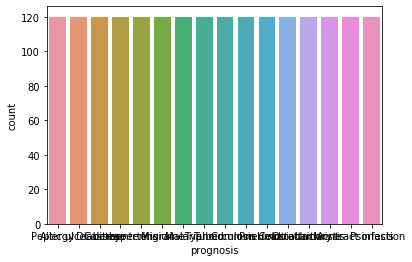

In [13]:
sns.countplot(training['prognosis'])

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=62)

In [15]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1440, 74), (1440,), (480, 74), (480,))

In [16]:
testx    = testing[cols]
testy    = testing['prognosis']  
testy    = le.transform(testy)

ValueError: y contains previously unseen labels: 'Hypertension '

In [17]:
clf1  = DecisionTreeClassifier()
clf = clf1.fit(x_train,y_train)
scores = cross_val_score(clf, x_test, y_test, cv=3)
print (scores.mean())

0.9812499999999998


In [18]:
pred_clf = clf.predict(x_test)

In [19]:
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        23
           4       1.00      1.00      1.00        22
           5       1.00      1.00      1.00        39
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        27
           8       1.00      1.00      1.00        30
           9       1.00      1.00      1.00        31
          10       1.00      1.00      1.00        26
          11       1.00      1.00      1.00        33
          12       1.00      1.00      1.00        32
          13       1.00      1.00      1.00        23
          14       1.00      1.00      1.00        33
          15       1.00      1.00      1.00        29

    accuracy                           1.00       480
   macro avg       1.00   

In [20]:
model=SVC()
model.fit(x_train,y_train)
print("for svm: ")
print(model.score(x_test,y_test))

for svm: 
1.0


In [21]:
pred_model = model.predict(x_test)

In [22]:
print(classification_report(y_test, pred_model))
print(confusion_matrix(y_test, pred_model))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        23
           4       1.00      1.00      1.00        22
           5       1.00      1.00      1.00        39
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        27
           8       1.00      1.00      1.00        30
           9       1.00      1.00      1.00        31
          10       1.00      1.00      1.00        26
          11       1.00      1.00      1.00        33
          12       1.00      1.00      1.00        32
          13       1.00      1.00      1.00        23
          14       1.00      1.00      1.00        33
          15       1.00      1.00      1.00        29

    accuracy                           1.00       480
   macro avg       1.00   

In [23]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
features = cols

In [24]:
def readn(nstr):
    engine = pyttsx3.init()

    engine.setProperty('voice', "english+f5")
    engine.setProperty('rate', 130)

    engine.say(nstr)
    engine.runAndWait()
    engine.stop()


In [25]:
severityDictionary=dict()
description_list = dict()
precautionDictionary=dict()

In [26]:
symptoms_dict = {}

In [27]:
for index, symptom in enumerate(x):
       symptoms_dict[symptom] = index

In [28]:
def calc_condition(exp,days):
    sum=0
    for item in exp:
         sum=sum+severityDictionary[item]
    if((sum*days)/(len(exp)+1)>13):
        print("You should take the consultation from a doctor. ")
    else:
        print("It might not be that bad but you should take precautions.")


In [29]:
def getDescription():
    global description_list
    with open('symptom_Description.csv') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            _description={row[0]:row[1]}
            description_list.update(_description)

In [30]:
def getSeverityDict():
    global severityDictionary
    with open('Symptom_severity.csv') as csv_file:

        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            _diction={row[0]: int(row[1])}
            severityDictionary.update(_diction)

In [31]:
def getprecautionDict():
    global precautionDictionary
    with open('symptom_precaution.csv') as csv_file:

        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            _prec={row[0]:[row[1],row[2],row[3],row[4]]}
            precautionDictionary.update(_prec)

In [32]:
def getInfo():
    
    print("Your Name \n\t\t\t\t\t\t",end="->")
    name=input("")
    print("Hello ",name)

In [33]:
def check_pattern(dis_list,inp):
    import re
    pred_list=[]
    ptr=0
    patt = "^" + inp + "$"
    regexp = re.compile(inp)
    for item in dis_list:

        if regexp.search(item):
            pred_list.append(item)
            # return 1,item
    if(len(pred_list)>0):
        return 1,pred_list
    else:
        return ptr,item

In [34]:
def sec_predict(symptoms_exp):
    df = pd.read_csv('Training.csv')
    X = df.iloc[:, :-1]
    y = df['prognosis']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
    rf_clf = DecisionTreeClassifier()
    rf_clf.fit(X_train, y_train)
    
    symptoms_dict = {}
    
    for index, symptom in enumerate(X):
        symptoms_dict[symptom] = index
    
    input_vector = np.zeros(len(symptoms_dict))
    for item in symptoms_exp:
        input_vector[[symptoms_dict[item]]] = 1


    return rf_clf.predict([input_vector])

In [35]:
def print_disease(node):
    node = node[0]
    val  = node.nonzero() 
    disease = le.inverse_transform(val[0])
    return disease

In [36]:
def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    # print(tree_)
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    
    chk_dis=",".join(feature_names).split(",")
    symptoms_present = []
    
    while True:

        print("Enter the symptom you are experiencing  "
      "\n Replace space with underscore e.g muscle_pain "
      "\n When asked follow up questions fill yes/no "
      "\n\t\t\t\t\t\t",end="->")
        disease_input = input("")
        conf,cnf_dis=check_pattern(chk_dis,disease_input)
        if conf==1:
            print("searches related to input: ")
            for num,it in enumerate(cnf_dis):
                print(num,")",it)
            if num!=0:
                print(f"Select the one you meant (0 - {num}):  ", end="")
                conf_inp = int(input(""))
            else:
                conf_inp=0

            disease_input=cnf_dis[conf_inp]
            break
            
        else:
            print("Enter valid symptom.")
    while True:
        try:
            num_days=int(input("Okay. For how many days ? : "))
            break
        except:
            print("Enter number of days.")
            
            
    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]

            if name == disease_input:
                val = 1
            else:
                val = 0
            if  val <= threshold:
                recurse(tree_.children_left[node], depth + 1)
            else:
                symptoms_present.append(name)
                recurse(tree_.children_right[node], depth + 1)
        else:
            present_disease = print_disease(tree_.value[node])

            red_cols = reduced_data.columns 
            symptoms_given = red_cols[reduced_data.loc[present_disease].values[0].nonzero()]

            print("Are you experiencing any ")
            symptoms_exp=[]
            for syms in list(symptoms_given):
                inp=""
                print(syms,"? : ",end='')
                while True:
                    inp=input("")
                    if(inp=="yes" or inp=="no"):
                        break
                    else:
                        print("provide proper answers i.e. (yes/no) : ",end="")
                if(inp=="yes"):
                    symptoms_exp.append(syms)
                    
            second_prediction=sec_predict(symptoms_exp)
           
            calc_condition(symptoms_exp,num_days)
            if(present_disease[0]==second_prediction[0]):
                print("You may have ", present_disease[0])

                print(description_list[present_disease[0]]) 
                
                
            else:
                print("You may have ", present_disease[0], "or ", second_prediction[0])
                print(description_list[present_disease[0]])
                print(description_list[second_prediction[0]])

            
            precution_list=precautionDictionary[present_disease[0]]
            print("Take following measures : ")
            for  i,j in enumerate(precution_list):
                print(i+1,")",j)
    
    
    recurse(0, 1)

In [37]:
getSeverityDict()
getDescription()
getprecautionDict()
getInfo()
tree_to_code(clf,cols)

Your Name 
						->Giddy
Hello  Giddy
Enter the symptom you are experiencing  
 Replace space with underscore e.g muscle_pain 
 When asked follow up questions fill yes/no 
						->red_head
Enter valid symptom.
Enter the symptom you are experiencing  
 Replace space with underscore e.g muscle_pain 
 When asked follow up questions fill yes/no 
						->muscle_pain
searches related to input: 
0 ) muscle_pain
Okay. For how many days ? : re
Enter number of days.
Okay. For how many days ? : 3
Are you experiencing any 
chills ? : yes
vomiting ? : yes
high_fever ? : yes
sweating ? : no
headache ? : great
provide proper answers i.e. (yes/no) : yes
nausea ? : no
diarrhoea ? : no
muscle_pain ? : yes
It might not be that bad but you should take precautions.
You may have  Malaria
An infectious disease caused by protozoan parasites from the Plasmodium family that can be transmitted by the bite of the Anopheles mosquito or by a contaminated needle or transfusion. Falciparum malaria is the most deadly 